# SQL Reference Sheet

## Data Definition Language (DDL)

In [ ]:
#Create table with CustomerID as primary key
CREATE TABLE CustomerDB
(CustomerID INTEGER NOT NULL PRIMARY KEY,
CustomerName VARCHAR NOT NULL,
JobPosition VARCHAR,
CompanyName VARCHAR NOT NULL, 
ContactNo BIGINTEGER NOT NULL);

#Adding column to table
ALTER TABLE CustomerDB ADD
CompanyAdd VARCHAR;

#Dropping columns from table
ALTER TABLE CustomerDB 
DROP COLUMN JobPosition, ContactNo;  

#Dropping table
DROP TABLE CustomerDB;   

### Data Type

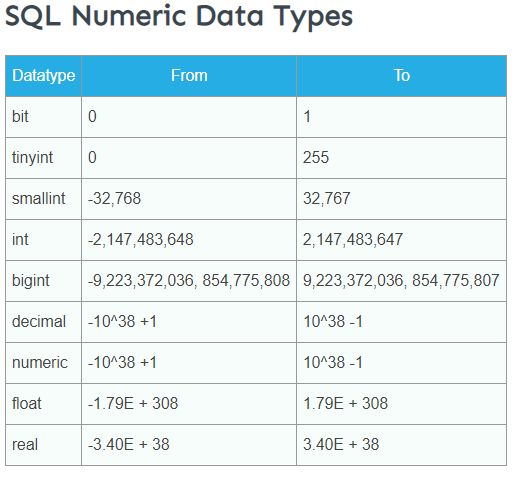

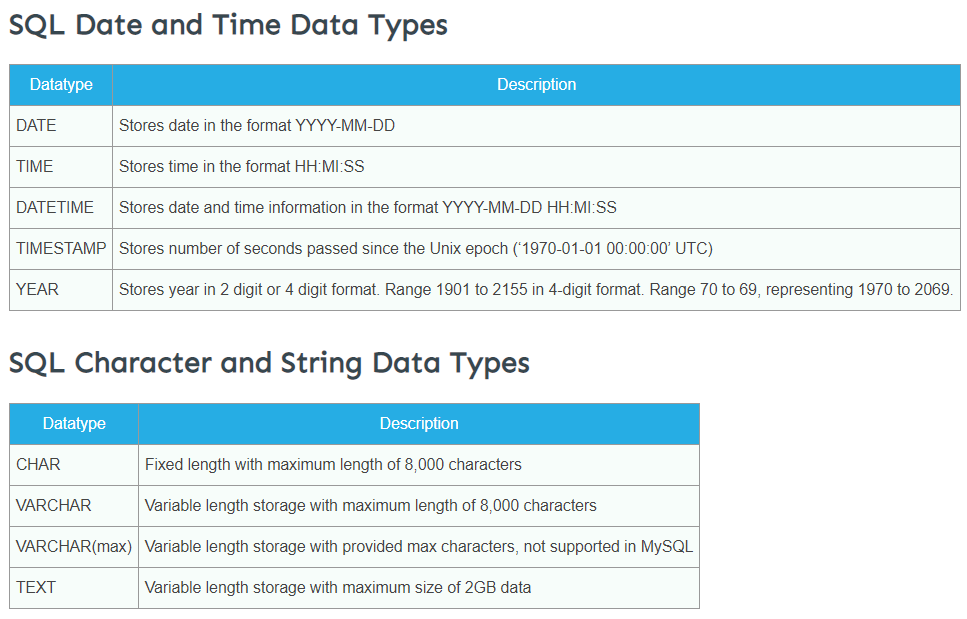

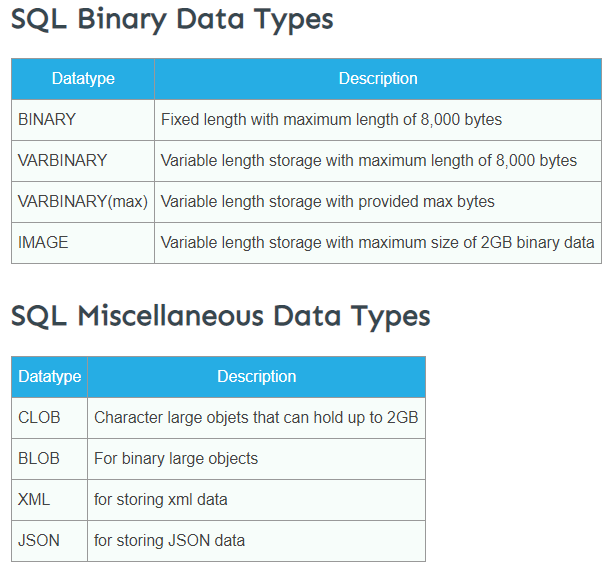

## Data Manipulation Language (DML)

In [ ]:
#load data from file
LOAD DATA INFILE 'çustomer.tab' 
INTO TABLE CustomerDB
FIELDS TERMINATED BY '\t'';

#insert multiple rows each time
INSERT INTO CustomerDB 
VALUES
(1, 'John Doe', 'VP', 'ABC', 452765),
(2, 'Andy Smith', 'Vice-President', 'Sales Direct', 841658);

#insert row with value for selected columns (can only skip columns which allow NULL values)
INSERT INTO CustomerDB (CustomerID, CustomerName, CompanyName, ContactNo)
VALUES
(3, 'Will Taylor', 'XYZ', 685484);


#Update one record each time
UPDATE CustomerDB
SET JobPosition = 'VP'
WHERE CustomerName = 'Will Taylor';

#Update multiple records each time
UPDATE CustomerDB
SET JobPosition = 'Vice-President'
WHERE JobPosition = 'VP' AND
Age BETWEEN 40 and 50;

#Update all records each time
UPDATE CustomerDB
SET CustomerName = UPPER(CustomerName);

#SQL Scalar Function
UCASE() - Converts a field to upper case
LCASE() - Converts a field to lower case
MID() - Extract characters from a text field
LEN() - Returns the length of a text field
ROUND() - Rounds a numeric field to the number of decimals specified
NOW() - Returns the current system date and time
FORMAT() - Formats how a field is to be displayed


#delete single record each time
DELETE FROM CustomerDB
WHERE CustomerName = 'WILL TAYLOR';

#delete multiple records each time
DELETE FROM CustomerDB
WHERE JobPosition = 'Vice-President';

#delete all records each time
DELETE FROM CustomerDB;

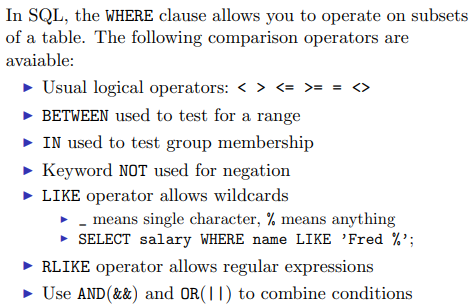

### Transaction Control

In [ ]:
DELETE FROM CustomerDB WHERE CustomerID = 3;
COMMIT;                                        #to commit changes

DELETE FROM CustomerDB WHERE CustomerID = 3;
ROLLBACK;                                      #to rollback changes


SAVEPOINT CustomerSP1;                         #create savepoint before executing transaction
DELETE FROM CustomerDB WHERE CustomerID = 3;
ROLLBACK TO CustomerSP1;                       #to reverse executed transaction


## Data Query Language

In [ ]:
#SELECT syntax
SELECT columns or computations
FROM table
WHERE condition
GROUP BY columns
HAVING condition
ORDER BY column [ASC | DESC]
LIMIT offset,count;


#select record showing all columns given condition
SELECT * FROM CustomerDB
WHERE JobPosition = 'Vice-President';

#select record for specific columns given condition
SELECT CustomerName, CompanyName
FROM CustomerDB
WHERE JobPosition = 'Vice-President';


#select records ordered by given column in ascending values
SELECT * FROM CustomerDB
ORDER BY CustomerName;

#select records ordered by given column in descending values
SELECT * FROM CustomerDB
ORDER BY CustomerName DESC;


#count number of records for each value of given column and ordered by descending values
SELECT JobPosition, COUNT(*) AS number
FROM CustomerDB
GROUP BY JobPosition
ORDER BY JobPosition DESC;

#count number of non-null values in given column
SELECT JobPosition, COUNT(JobPosition) AS number
FROM CustomerDB
GROUP BY JobPosition;

#compute average of values in given columns
SELECT gender, class, count(*) AS n,
AVG(weight/(height*height)) AS bmi
FROM studentsDB
GROUP BY gender, class;

#use HAVING condition
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 5;


#SQL Aggregate Functions
AVG() - Returns the average value
COUNT() - Returns the number of rows
FIRST() - Returns the first value
LAST() - Returns the last value
MAX() - Returns the largest value
MIN() - Returns the smallest value
SUM() - Returns the sum

## Views

In [ ]:
#create view with given columns
CREATE VIEW CustomerContact AS
SELECT CustomerName, ContactNo FROM CustomerDB;

#create view from multiple tables
CREATE VIEW OrderDelivery AS 
SELECT OrderDB.OrderID,                           #retaining column name
CustomerDB.CompanyName AS CompanyDeliveredTo,     #renaming column
CustomerDB.CustomerName AS CustomerDeliveredTo,
OrderDB.OrderQty FROM CustomerDB, OrderDB 
WHERE OrderDB.CustomerID = CustomerDB.CustomerID;

#to delete view
DROP VIEW CustomerContact;

## Indexes

In [ ]:
CREATE INDEX CustomerID_IDX on OrderDB (CustomerID);

DROP INDEX CustomerID_IDX;
